# Project 1: Linear Regression

## Honey Production
Now that you have learned how linear regression works, let’s try it on an example of real-world data.

As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

Note: All the tasks can be completed using Pandas or NumPy. Pick whichever one you prefer.

**Instructions:**

Check out the Data

1.
We have loaded in a DataFrame for you about honey production in the United States from Kaggle. It is called df and has the following columns:

        state
        numcol
        yieldpercol
        totalprod
        stocks
        priceperlb
        prodvalue
        year
        
Use .head() to get a sense of how this DataFrame is structured.

2.
For now, we care about the total production of honey per year. Use the .groupby() method provided by pandas to get the mean of totalprod per year.

Store this in a variable called prod_per_year.

3.
Create a variable called X that is the column of years in this prod_per_year DataFrame.

After creating X, we will need to reshape it to get it into the right format, using this command:

X = X.values.reshape(-1, 1)

4.
Create a variable called y that is the totalprod column in the prod_per_year dataset.

5.
Using plt.scatter(), plot y vs X as a scatterplot.

Display the plot using plt.show().

Can you see a vaguely linear relationship between these variables?

Create and Fit a Linear Regression Model

6.
Create a linear regression model from scikit-learn and call it regr.

Use the LinearRegression() constructor from the linear_model module to do this.

7.
Fit the model to the data by using .fit(). You can feed X into your regr model by passing it in as a parameter of .fit().

8.
After you have fit the model, print out the slope of the line (stored in a list called regr.coef_) and the intercept of the line (regr.intercept_).

9.
Create a list called y_predict that is the predictions your regr model would make on the X data.

10.
Plot y_predict vs X as a line, on top of your scatterplot using plt.plot().

Make sure to call plt.show() after plotting the line.

Predict the Honey Decline

11.
So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050. The code below makes a NumPy array with the numbers 1 through 10

        nums = np.array(range(1, 11))
After creating that array, we need to reshape it for scikit-learn.

        X_future = X_future.reshape(-1, 1)
You can think of reshape() as rotating this array. Rather than one big row of numbers, X_future is now a big column of numbers — there’s one number in each row.

reshape() is a little tricky! It might help to print out X_future before and after reshaping.

12.
Create a list called future_predict that is the y-values that your regr model would predict for the values of X_future.

13.
Plot future_predict vs X_future on a different plot.

How much honey will be produced in the year 2050, according to this?

**Solution:**

  state   numcol  yieldpercol  totalprod     stocks  priceperlb  prodvalue  \
0    AL  16000.0           71  1136000.0   159000.0        0.72   818000.0   
1    AZ  55000.0           60  3300000.0  1485000.0        0.64  2112000.0   

   year  
0  1998  
1  1998  
[-88303.18915238] 181208083.10732982


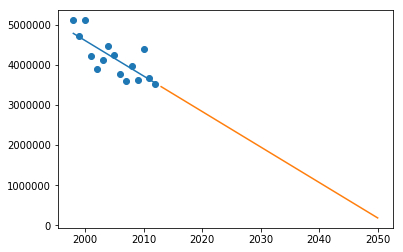

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

# inspect the data frame
print(df.head(2))

prod_per_year = df.groupby('year').totalprod.mean().reset_index()
#print(prod_per_year)

X = prod_per_year['year']
# Rotate X to form a nx1 matrix
X = X.values.reshape(-1,1)
#print(X)
y = prod_per_year['totalprod']
#print(y)
plt.scatter(X,y)
#plt.show()

# create and fit a linear reg model
regr = linear_model.LinearRegression()
regr.fit(X,y)

slope = regr.coef_
intercept = regr.intercept_

print(slope, intercept)

y_predict = regr.predict(X)

plt.plot(X, y_predict)
#plt.show()

# predict the honey decline
# np array of future years 2013-2050
X_future = np.array(range(2013,2051))
# reshape the array for sci-kit learn
X_future = X_future.reshape(-1,1)
# predicted production for the future
future_predict = regr.predict(X_future)

# plot the future values on a different plot
plt.plot(X_future, future_predict)
plt.show()

# Project 2: Classification: K-Nearest Neighbors


## Breast Cancer Classifier
In this project, we will be using several Python libraries to make a K-Nearest Neighbor classifier that is trained to predict whether a patient has breast cancer.

**Instructions:**

Explore the data

1.
Let’s begin by importing the breast cancer data from sklearn. We want to import the function load_breast_cancer from sklearn.datasets.

Once we’ve imported the dataset, let’s load the data into a variable called breast_cancer_data. Do this by setting breast_cancer_data equal to the function load_breast_cancer().

2.
Before jumping into creating our classifier, let’s take a look at the data. Begin by printing breast_cancer_data.data[0]. That’s the first datapoint in our set. But what do all of those numbers represent? Let’s also print breast_cancer_data.feature_names.

3.
We now have a sense of what the data looks like, but what are we trying to classify? Let’s print both breast_cancer_data.target and breast_cancer_data.target_names.

Was the very first data point tagged as malignant or benign?
**Hint:**
breast_cancer_data.target gives you the labels of every data point. The very first data point in the set had a label of 0. By looking at the target_names, we know that 0 corresponds to malignant.

Splitting the data into Training and Validation Sets

4.
We have our data, but now it needs to be split into training and validation sets. Luckily, sklearn has a function that does that for us. Begin by importing the train_test_split function from sklearn.model_selection.

5.
Call the train_test_split function. It takes several parameters:

    - The data you want to split (for us breast_cancer_data.data)
    - The labels associated with that data (for us, breast_cancer_data.target).
    - The test_size. This is what percentage of your data you want to be in your testing set. Let’s use test_size = 0.2
    - random_state. This will ensure that every time you run your code, the data is split in the same way. This can be any number. We used random_state = 100.

6.
Right now we’re not storing the return value of train_test_split. train_test_split returns four values in the following order:

        The training set
        The validation set
        The training labels
        The validation labels
Store those values in variables named training_data, validation_data, training_labels, and validation_labels.

7.
Let’s confirm that worked correctly. Print out the length of training_data and training_labels. They should be the same size - one label for every piece of data!

Running the classifier

8.
Now that we’ve created training and validation sets, we can create a KNeighborsClassifier and test its accuracy. Begin by importing KNeighborsClassifier from sklearn.neighbors.

9.
Create a KNeighborsClassifier where n_neighbors = 3. Name the classifier classifier.

10.
Train your classifier using the fit function. This function takes two parameters: the training set and the training labels.

11.
Now that the classifier has been trained, let’s find how accurate it is on the validation set. Call the classifier’s score function. score takes two parameters: the validation set and the validation labels. Print the result!

12.
The classifier does pretty well when k = 3. But maybe there’s a better k! Put the previous 3 lines of code inside a for loop. The loop should have a variable named k that starts at 1 and increases to 100. Rather than n_neighbors always being 3, it should be this new variable k.

You should now see 100 different validation accuracies print out. Which k seems the best?

Graphing the results

13.
We now have the validation accuracy for 100 different ks. Rather than just printing it out, let’s make a graph using matplotlib. Begin by importing matplotlib.pyplot as plt.

14.
The x-axis should be the values of k that we tested. This should be a list of numbers between 1 and 100. You can use the range function to make this list. Store it in a variable named k_list.

15.
The y-axis of our graph should be the validation accuracy. Instead of printing the validation accuracies, we want to add them to a list. Outside of the for loop, create an empty list named accuracies. Inside the for loop, instead of printing each accuracy, append it to accuracies.

16.
We can now plot our data! Call plt.plot(). The first parameter should be k_list and the second parameter should be accuracies.

After plotting the graph, show it using plt.show().

17.
Let’s add some labels and a title. Set the x-axis label to "k" using plt.xlabel(). Set the y-axis label to "Validation Accuracy". Set the title to "Breast Cancer Classifier Accuracy".

18.
Great work! If you want to play around with this more, try changing the random_state parameter when making the training set and validation set. This will change which points are in the training set and which are in the validation set.

Ideally, the graph will look the same no matter how you split up the training set and test set. This data set is fairly small, so there is slightly more variance than usual.

**Solution:**

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1

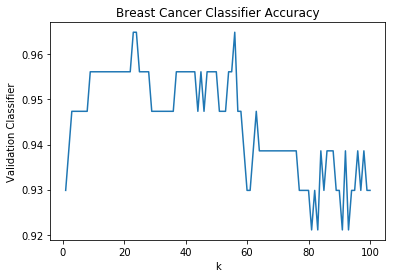

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

breast_cancer_data = load_breast_cancer()
# peek a the data
print(breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)

# peek into waht we are supposed to classify
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

# Splitting the data into Training and Validation Sets
# call train_test_split(data, labels, test_size, random_state)
#train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)
# store return values of train_test_split() into vars
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

# testing if train_test_split() was successful
# if successful, len(training_data)==len(training_labels)
print(len(training_data))
print(len(training_labels))

# k-neighbors classsifier with k=3
#classifier = KNeighborsClassifier(n_neighbors = 50)
# train the classifier
#classifier.fit(training_data, training_labels)
# test accuracy of the classifier
#accuracy = classifier.score(validation_data, validation_labels)
#print(accuracy)

# finding out the best k between 1-100
k_list = range(1,101)

accuracies = []
for k in range(1,101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  #print(classifier.score(validation_data, validation_labels))
  # highest accuracy is 0.9649 when  k=23 or k=24
  # append accuracy scores to accuracies list
  accuracies.append(classifier.score(validation_data, validation_labels))
  
# graphing the results
# the elbow method of choosing K's
# x-axis values = k_list
# y-axis values = accuracies
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Classifier")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()


# Project 3: Clustering K-Means

## Handwriting Recognition using K-Means

The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

        - ATMs can recognize handwritten bank checks
        - Evernote can recognize handwritten task lists
        - Expensify can recognize handwritten receipts
        
But how do they do it?

In this project, you will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

**Instructions:**

Getting Started with the Digits Dataset:
1.
The sklearn library comes with a digits dataset for practice.

In script.py, we have already added three lines of code:

 
    import numpy as np
    from matplotlib import pyplot as plt
    From sklearn library, import the datasets module.

Then, load in the digits data using .load_digits() and print digits.

2.
When first starting out with a dataset, it’s always a good idea to go through the data description and see what you can already learn.

Instead of printing the digits, print digits.DESCR.

What is the size of an image (in pixel)?
Where is this dataset from?

3.
Let’s see what the data looks like!

Print digits.data.

4.
Next, print out the target values in digits.target.

5.
To visualize the data images, we need to use Matplotlib. Let’s visualize the image at index 100:

        plt.gray() 

        plt.matshow(digits.images[100])

        plt.show()
The image should look like:

4

Is it a 4? Let’s print out the target label at index 100 to find out!

        print(digits.target[100])
        
Open the hint to see how you can visualize more than one image.

K-Means Clustering:

6.
Now we understand what we are working with. Let’s cluster the 1797 different digit images into groups.

Import KMeans from sklearn.cluster.

7.
What should be the k, the number of clusters, here?

Use the KMeans() method to build a model that finds k clusters.

8.
Use the .fit() method to fit the digits.data to the model.

Visualizing after K-Means:

9.
Let’s visualize all the centroids! Because data samples live in a 64-dimensional space, the centroids have values so they can be images!

First, add a figure of size 8x3 using .figure().

Then, add a title using .suptitle().

10.
Scikit-learn sometimes calls centroids “cluster centers”.

Write a for loop to displays each of the cluster_centers_ like so:

        for i in range(10):

          # Initialize subplots in a grid of 2X5, at i+1th position
          ax = fig.add_subplot(2, 5, 1 + i)

          # Display images
          ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
The cluster centers should be a list with 64 values (0-16). Here, we are making each of the cluster centers into an 8x8 2D array.

11.
Outside of the for loop, use .show() to display the visualization.

It should look like:

8

These are the centroids of handwriting from thirty different people collected by Bogazici University (Istanbul, Turkey):

        Index 0 looks like 0
        Index 1 looks like 9
        Index 2 looks like 2
        Index 3 looks like 1
        Index 4 looks like 6
        Index 5 looks like 8
        Index 6 looks like 4
        Index 7 looks like 5
        Index 8 looks like 7
        Index 9 looks like 3
Notice how the centroids that look like 1 and 8 look very similar and 1 and 4 also look very similar.

12.
Optional:

If you want to see another example that visualizes the data clusters and their centers using K-means, check out the sklearn‘s own example.

8

Testing Your Model:

13.
Instead of feeding new arrays into the model, let’s do something cooler!

Inside the right panel, go to test.html.

14.
What year will robots take over the world?

Use your mouse to write a digit in each of the boxes and click Get Array.

15.
Back in script.py, create a new variable named new_samples and copy and paste the 2D array into it.

        new_samples = np.array(      )

16.
Use the .predict() function to predict new labels for these four new digits. Store those predictions in a variable named new_labels.

17.
But wait, because this is a clustering algorithm, we don’t know which label is which.

By looking at the cluster centers, let’s map out each of the labels with the digits we think it represents:

        for i in range(len(new_labels)):
          if new_labels[i] == 0:
            print(0, end='')
          elif new_labels[i] == 1:
            print(9, end='')
          elif new_labels[i] == 2:
            print(2, end='')
          elif new_labels[i] == 3:
            print(1, end='')
          elif new_labels[i] == 4:
            print(6, end='')
          elif new_labels[i] == 5:
            print(8, end='')
          elif new_labels[i] == 6:
            print(4, end='')
          elif new_labels[i] == 7:
            print(5, end='')
          elif new_labels[i] == 8:
            print(7, end='')
          elif new_labels[i] == 9:
            print(3, end='')

18.
Is the model recognizing your handwriting?

Remember, this model is trained on handwritten digits of 30 Turkish people (from the 1990’s).

Try writing your digits similar to these cluster centers:

**Solution:**

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

<Figure size 432x288 with 0 Axes>

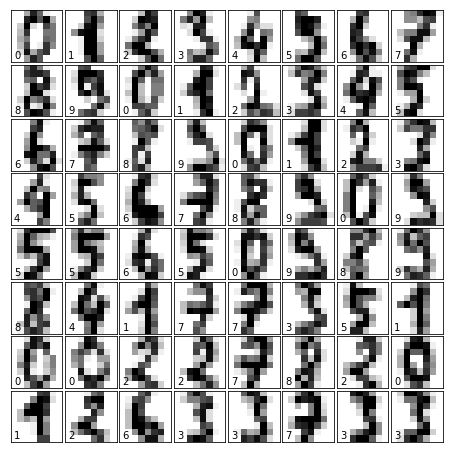

<Figure size 432x288 with 0 Axes>

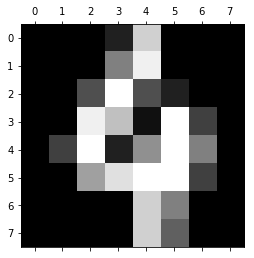

4


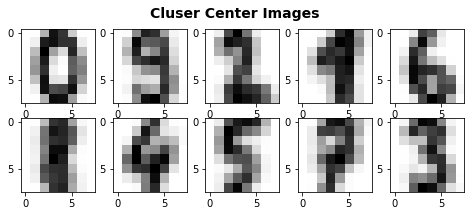

0004[0 0 0 6]


In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

digits = datasets.load_digits()
#print(digits)
print(digits.DESCR)
print(digits.data)
print(digits.target)

# visualizing the data images
# take a look at 64 sample images.
plt.gray()
# Figure size (width, height)
fig = plt.figure(figsize=(6, 6))
# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
#plt.matshow(digits.images[100])
plt.show()

# visualize the image at index 100
plt.gray() 
plt.matshow(digits.images[100])
plt.show()
# print what the plotted digit is: target label
print(digits.target[100])

# building a model of 10 clusters
# ie k=10 because we have ten digits
model = KMeans(n_clusters = 10, random_state = 42)
model.fit(digits.data)

# visualizing after K-Means
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')
for i in range(10):
  # Initialize subplots in a grid of 2x5, at i+1th 
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
# The cluster centers should be a list with 64 values (0-16). 
# Here, we are making each of the cluster centers into an 8x8 2D array.
plt.show()


new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.14,7.47,6.55,3.43,0.15,0.00,0.00,0.07,6.62,6.68,5.93,7.62,5.10,0.00,0.00,1.60,7.62,2.79,0.00,3.88,7.62,2.20,0.00,2.29,7.62,1.52,0.00,0.15,6.78,5.68,0.00,1.68,7.62,3.35,0.00,0.00,5.94,5.70,0.00,0.07,5.86,7.55,5.61,4.80,7.62,4.09,0.00,0.00,0.45,4.25,6.25,6.86,4.72,0.38,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.03,7.09,7.62,6.63,1.59,0.00,0.00,3.28,7.55,5.71,3.58,6.85,6.93,0.58,0.00,7.00,5.94,0.23,0.00,1.58,7.55,4.03,0.61,7.62,3.43,0.00,0.00,0.00,6.47,5.25,0.68,7.62,4.18,0.23,0.00,3.10,7.62,3.50,0.00,5.56,7.62,7.45,7.01,7.62,5.49,0.23,0.00,0.15,2.28,3.80,3.81,2.89,0.13,0.00],
[0.00,0.00,0.00,0.99,1.14,0.08,0.00,0.00,0.00,0.00,1.88,7.32,7.62,6.86,1.67,0.00,0.00,0.67,6.93,6.86,3.28,6.78,7.39,0.68,0.00,3.57,7.62,1.37,0.00,1.82,7.62,2.89,0.00,3.81,7.62,0.77,0.00,0.00,7.01,4.79,0.00,1.51,7.39,6.23,1.37,0.68,6.70,5.24,0.00,0.00,2.13,7.24,7.62,7.62,7.55,2.44,0.00,0.00,0.00,0.83,2.44,3.05,1.80,0.00],
[0.00,0.00,0.00,0.00,1.06,1.52,0.38,0.00,0.00,0.00,0.08,4.02,7.62,7.62,7.39,2.79,0.00,0.08,3.79,7.62,5.25,2.21,5.94,7.44,0.00,4.48,7.62,5.62,0.33,0.00,2.29,7.62,0.00,6.09,6.32,0.15,0.00,0.00,3.12,7.62,0.00,3.42,7.62,6.28,3.35,3.35,7.39,6.25,0.00,0.00,2.58,7.01,7.62,7.62,6.02,0.66,0.00,0.00,0.00,0.00,0.38,0.76,0.13,0.00]
])

new_labels = model.predict(new_samples)
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')
print(new_labels) 


# Project 4: Logistic Regression

## Predict Titanic Survival

The RMS Titanic set sail on its maiden voyage in 1912, crossing the Atlantic from Southampton, England to New York City. The ship never completed the voyage, sinking to the bottom of the Atlantic Ocean after hitting an iceberg, bringing down 1,502 of 2,224 passengers onboard.

In this project you will create a Logistic Regression model that predicts which passengers survived the sinking of the Titanic, based on features like age and class.

The data we will be using for training our model is provided by Kaggle. Feel free to make the model better on your own and submit it to the Kaggle Titanic competition!(https://www.kaggle.com/c/titanic)


**Instructions:**

Load the Data
1.
The file passengers.csv contains the data of 892 passengers onboard the Titanic when it sank that fateful day. Let’s begin by loading the data into a pandas DataFrame named passengers. Print passengers and inspect the columns. What features could we use to predict survival?

Clean the Data

2.
Given the saying, “women and children first,” Sex and Age seem like good features to predict survival. Let’s map the text values in the Sex column to a numerical value. Update Sex such that all values female are replaced with 1 and all values male are replaced with 0.

3.
Let’s take a look at Age. Print passengers['Age'].values. You can see we have multiple missing values, or nans. Fill all the empty Age values in passengers with the mean age.

**Hint:** The .fillna() method allows us to fill all the missing values in a column with the below syntax:

             data_frame(['column']).fillna(value='value_to_replace_nan',inplace=True)
- data_frame is the name of the DataFrame
- column is name of the column in which we want to fill missing values
- value_to_replace_nan is the value that will replace the missing values
- inplace=True fills the missing values in our DataFrame rather than returning a new DataFrame

4.
Given the strict class system onboard the Titanic, let’s utilize the Pclass column, or the passenger class, as another feature. Create a new column named FirstClass that stores 1 for all passengers in first class and 0 for all other passengers.

**Hint:** We can create the FirstClass column in passengers with the following syntax:

        passengers['FirstClass'] = expression_for_column_values
    
To set the value of FirstClass for each passenger to 1 or 0, we can use pandas‘ .apply() method on Pclass as shown below:

        passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)

5.
Create a new column named SecondClass that stores 1 for all passengers in second class and 0 for all other passengers.

Print passengers and inspect the DataFrame to ensure all the updates have been made.

Select and Split the Data

6.
Now that we have cleaned our data, let’s select the columns we want to build our model on. Select columns Sex, Age, FirstClass, and SecondClass and store them in a variable named features. Select column Survived and store it a variable named survival.

7.
Split the data into training and test sets using sklearn‘s train_test_split() method. We’ll use the training set to train the model and the test set to evaluate the model.

**Hint:** We can create training and test sets using train_test_split() with the below syntax:

        train_test_split(features,labels,test_size = 0_to_1_test_size)
- features is the feature data
- labels are the labels for the feature data
- 0_to_1_test_size is a number from 0 to 1 indicating the percentage of data that should be saved for the test set
- train_test_split() will return, in this order, the training features (X_train), the testing features (X_test), the training labels (y_train), and the testing labels (y_test).

Normalize the Data

8.
Since sklearn‘s Logistic Regression implementation uses *Regularization*, we need to scale our feature data. Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

**Hint:** We can create a StandardScaler object with the below syntax:

        scaler = StandardScaler()
        
To determine the scaling factors and apply the scaling to the feature data:

        train_features = scaler.fit_transform(train_features)
        
To apply the scaling to the test data:

        test_features = scaler.transform(test_features)

- Create and Evaluate the Model

9.
Create a LogisticRegression model with sklearn and .fit() it on the training data.

Fitting the model will perform gradient descent to find the feature coefficients that minimize the log-loss for the training data.

10.
.score() the model on the training data and print the training score.

Scoring the model on the training data will run the data through the model and make final classifications on survival for each passenger in the training set. The score returned is the percentage of correct classifications, or the accuracy.

11.
.score() the model on the test data and print the test score.

Similarly, scoring the model on the testing data will run the data through the model and make final classifications on survival for each passenger in the test set.

How well did your model perform?

12.
Print the feature coefficients determined by the model. Which feature is most important in predicting survival on the sinking of the Titanic?

Predict with the Model

13.
Let’s use our model to make predictions on the survival of a few fateful passengers. Provided in the code editor is information for 3rd class passenger Jack and 1st class passenger Rose, stored in NumPy arrays. The arrays store 4 feature values, in the following order:

Sex, represented by a 0 for male and 1 for female
Age, represented as an integer in years
FirstClass, with a 1 indicating the passenger is in first class
SecondClass, with a 1 indicating the passenger is in second class
A third array, You, is also provided in the code editor with empty feature values. Update the array You with your information, or for some fictitious passenger. Make sure to enter all values as floats with a .!

14.
Combine Jack, Rose, and You into a single NumPy array named sample_passengers.

15.
Since our Logistic Regression model was trained on scaled feature data, we must also scale the feature data we are making predictions on. Using the StandardScaler object created earlier, apply its .transform() method to sample_passengers and save the result to sample_passengers.

Print sample_passengers to view the scaled features.

16.
Who will survive, and who will sink? Use your model’s .predict() method on sample_passengers and print the result to find out.

Want to see the probabilities that led to these predictions? Call your model’s .predict_proba() method on sample_passengers and print the result. The 1st column is the probability of a passenger perishing on the Titanic, and the 2nd column is the probability of a passenger surviving the sinking (which was calculated by our model to make the final classification decision).

**Solution:**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the passenger data
passengers = pd.read_csv('passengers.csv')
print(passengers.head(2))

# data cleaning
# Update sex column to numerical
passengers['Sex'] = passengers['Sex'].map({'male':0, 'female':1})

# Fill the nan values in the age column using 
#.fillna(data_frame, column, value_to_replace_nan, inplace) method
#print(passengers['Age'].values)
passengers['Age'].fillna(value=round(passengers['Age'].mean()), inplace=True)

# Create a first class column
passengers["FirstClass"] = passengers['Pclass'].apply(lambda p: 1 if p == 1 else 0)

# Create a second class column
passengers["SecondClass"] = passengers['Pclass'].apply(lambda p: 1 if p == 2 else 0)

# inspect the data frame to check if cleaning/changes successful
print(passengers.head(2))

# selecting and splitting the data:
# Select the desired features
features = passengers[['Sex', 'Age', 'FirstClass','SecondClass']]
# labels
survival = passengers['Survived']

# Perform train, test, split. save returned vals in 4 vars:
train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

# Normalize the data:
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Create and train the model
model = LogisticRegression()
model.fit(train_features, train_labels)

# Score the model on the train data
print(model.score(train_features, train_labels))

# Score the model on the test data
print(model.score(test_features, test_labels))

# Analyze the coefficients
print(model.coef_)

# predicting with the model:
# Sample passenger features
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([0.0,25,1.0,0.0])
#You = np.array([___,___,___,___])

# Combine passenger arrays
sample_passengers = np.array([Jack, Rose, You])

# Scale the sample passenger features
sample_passengers = scaler.transform(sample_passengers)

# Make survival predictions!
print(model.predict(sample_passengers))

# probabilities:
print(model.predict_proba(sample_passengers))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   

      Ticket     Fare Cabin Embarked  FirstClass  SecondClass  
0  A/5 21171   7.2500   NaN        S           0            0  
1   PC 17599  71.2833   C85        C    

h:\python\datascience\venv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
h:\python\datascience\venv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
h:\python\datascience\venv\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
h:\python\datascience\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Project 5: Decision Trees in SK-Learn

## Find the Flag

In this project, we’ll use decision trees to try to predict the continent of flags based on several features.

We’ll explore which features are the best to use and the best way to create your decision tree.


**Instructions:**
Investigate the Data

1.
Let’s start by seeing what the data looks like. Begin by loading the data into a variable named flags using Panda’s pd.read_csv() function. The function should take the name of the CSV file you want to load. In this case, our file is named "flags.csv".

We also want row 0 to be used as the header, so include the parameter header = 0.

2.
Take a look at the names of the columns in our DataFrame. These are the features we have available to us. Print flags.columns.

Let’s also take a look at the first few rows of the dataset. Print flags.head().

3.
Many columns contain numbers that don’t make a lot of sense. For example, the third row, which represents Algeria, has a Language of 8. What exactly does that mean?

Take a look at the Attribute Information for this dataset from UCI’s Machine Learning Repository(http://archive.ics.uci.edu/ml/datasets/Flags).

Using that information along with the printout of flags.head(), can you figure out what landmass Andora is on?

Creating Your Data and Labels

4.
We’re eventually going to use create a decision tree to classify what Landmass a country is on.

Create a variable named labels and set it equal to only the "Landmass" column from flags.

You can grab specific columns from a DataFrame using this syntax:

        one_column = df[["A"]]
        two_columns = df[["B", "C"]]
In this example, one_column will be a DataFrame of only df‘s "A" column. two_columns will be a DataFrame of the "B" and "C" columns from df.

5.
We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels.

You could spend a lot of time playing with groups of columns to find the that work best. But for now, let’s see if we can predict where a country is based only on the colors of its flag.

Create a variable named data and set it equal to a DataFrame containing the following columns from flags:

        "Red"
        "Green"
        "Blue"
        "Gold"
        "White"
        "Black"
        "Orange"

6.
Finally, let’s split these DataFrames into a training set and test set using the train_test_split() function. This function should take data and labels as parameters. Also include the parameter random_state = 1.

This function returns four values. Name those values train_data, test_data, train_labels, and test_labels in that order.

Make and Test the Model
7.
Create a DecisionTreeClassifier and name it tree. When you create the tree, give it the parameter random_state = 1.

8.
Call tree‘s .fit() method using train_data and train_labels to fit the tree to the training data.

9.
Call .score() using test_data and test_labels. Print the result.

Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% of the time. Did our decision tree beat randomly guessing?

Tuning the Model
10.
We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better!

Put your code that creates, trains, and tests the tree inside a for loop that has a variable named i that increases from 1 to 20.

Inside your for loop, when you create tree, give it the parameter max_depth = i.

We’ll now see a printout of how the accuracy changes depending on how large we allow the tree to be.

11.
Rather than printing the score of each tree, let’s graph it! We want the x-axis to show the depth of the tree and the y-axis to show the tree’s score.

To do this, we’ll need to create a list containing all of the scores. Before the for loop, create an empty list named scores. Inside the loop, instead of printing the tree’s score, use .append() to add it to scores.

12.
Let’s now plot our points. Call plt.plot() using two parameters. The first should be the points on the x-axis. In this case, that is range(1, 21). The second should be scores.

Then call plt.show().

13.
Our graph doesn’t really look like we would expect it to. It seems like the depth of the tree isn’t really having an impact on its performance. This might be a good indication that we’re not using enough features.

Let’s add all the features that have to do with shapes to our data. data should now be set equal to:

        flags[["Red", "Green", "Blue", "Gold",
         "White", "Black", "Orange",
         "Circles",
        "Crosses","Saltires","Quarters","Sunstars",
        "Crescent","Triangle"]]
What does your graph look like after making this change?

Explore on Your Own

14.
Nice work! That graph looks more like what we’d expect. If the tree is too short, we’re underfitting and not accurately representing the training data. If the tree is too big, we’re getting too specific and relying too heavily on the training data.

There are a few different ways to extend this project:

- Try to classify something else! Rather than predicting the "Landmass" feature, could predict something like the "Language"?
- Find a subset of features that work better than what we’re currently using. An important note is that a feature that has categorical data won’t work very well as a feature. For example, we don’t want a decision node to split nodes based on whether the value for "Language" is above or below 5.
- Tune more parameters of the model. You can find a description of all the parameters you can tune in the Decision Tree Classifier documentation(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). For example, see what happens if you tune max_leaf_nodes. Think about whether you would be overfitting or underfitting the data based on how many leaf nodes you allow.

**Solution:**

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')
          Name  Landmass  Zone  Area  Population  Language  Religion  Bars  \
0  Afghanistan         5     1   648          16        10         2     0   
1      Albania         3     1    29           3         6         6     0   

   Stripes  Colors  ...  Saltires  Quarters  Sunstars  Crescent  Triangle  \
0        3       5  ...         0         0         1         0         0   
1        0       3  ...         0         0         1         0         0   

   Icon  Animate Text  Topleft  Botright  
0     1        0    0    black     green  
1     0        1    0      red       red  

[2 rows x 30 columns]


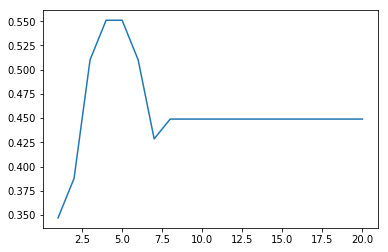

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# investigating the data
flags = pd.read_csv("flags.csv", header=0)
print(flags.columns)
print(flags.head(2))

# creating data and labels
labels = flags[['Landmass']]
#data = flags[["Red","Green","Blue","Gold","White","Black","Orange"]]
data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

# make and test the model: Before tuning:

#tree = DecisionTreeClassifier()
#tree.fit(train_data, train_labels)
#print(tree.score(test_data, test_labels))

# tuning the model by pruning
scores = []
for i in range(1,21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data, test_labels))

plt.plot(range(1,21), scores)
plt.show()